In [1]:
import pandas as pd
import numpy as np

In [2]:
%ls

average-res.log                    split4-back-cut-diff-pool.log
split1-back-cut-diff-pool.log      split4-back-cut-diff-pool-res.log
split1-back-cut-diff-pool-res.log  split5-back-cut-diff-pool.log
split2-back-cut-diff-pool.log      split5-back-cut-diff-pool-res.log
split2-back-cut-diff-pool-res.log  splt3-back-cut-diff-pool-res.log
split3-back-cut-diff-pool.log      Untitled.ipynb


In [28]:
import re
import matplotlib.pyplot as plt

In [64]:
t = np.array([1, 2, 3, 4, 5, 2, 3])
np.argmax(t)

4

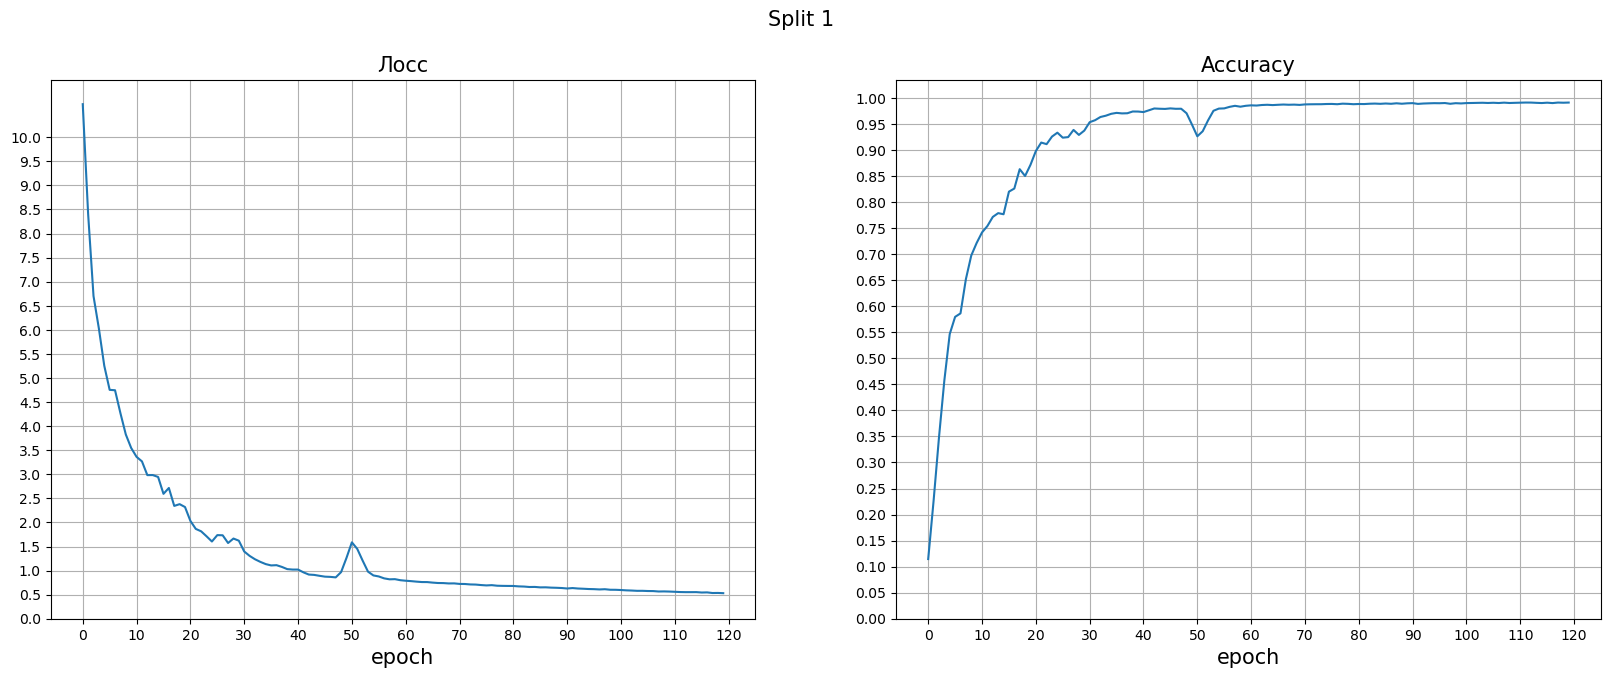

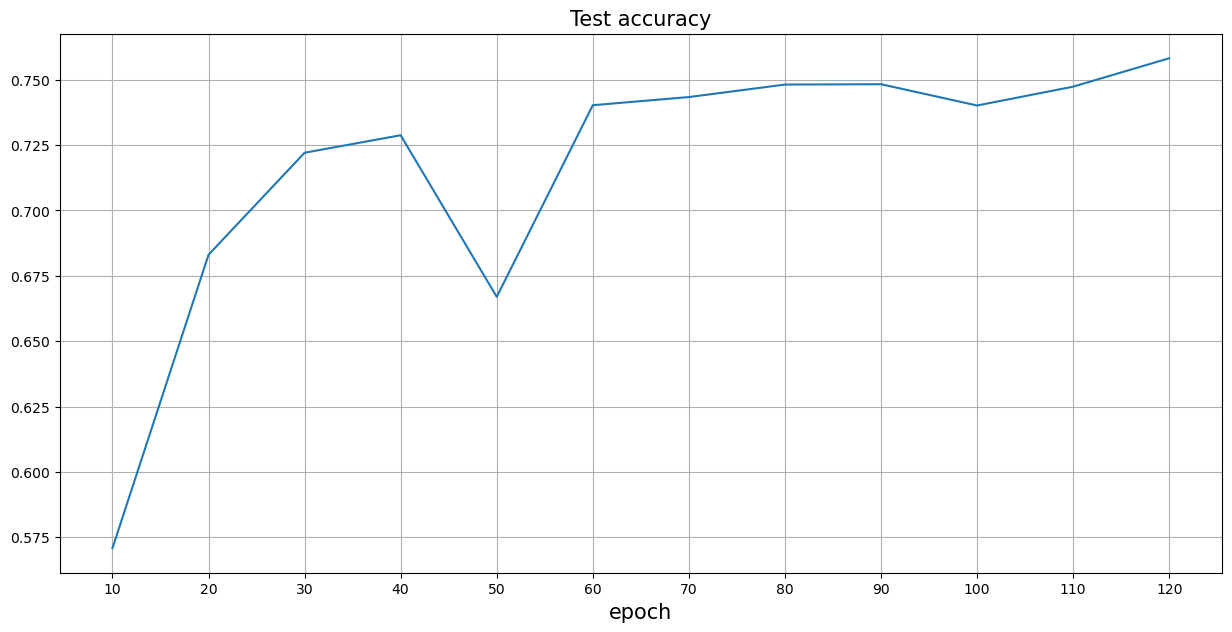

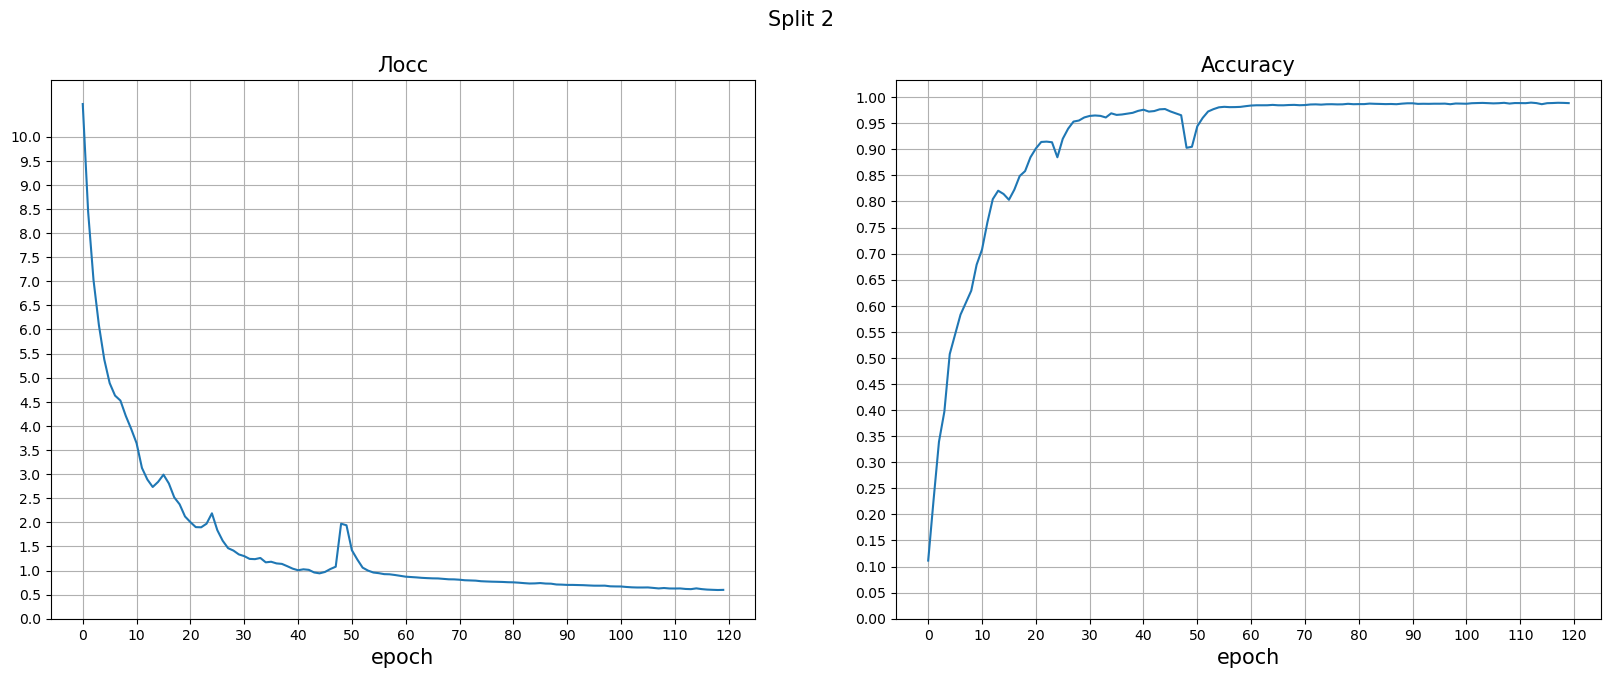

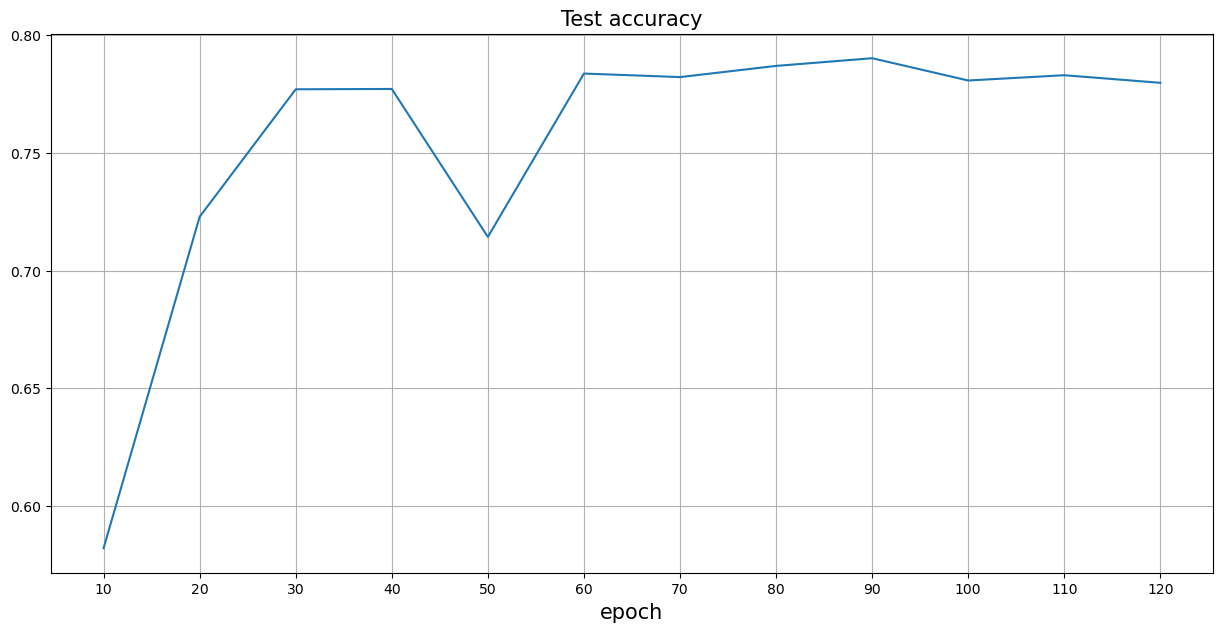

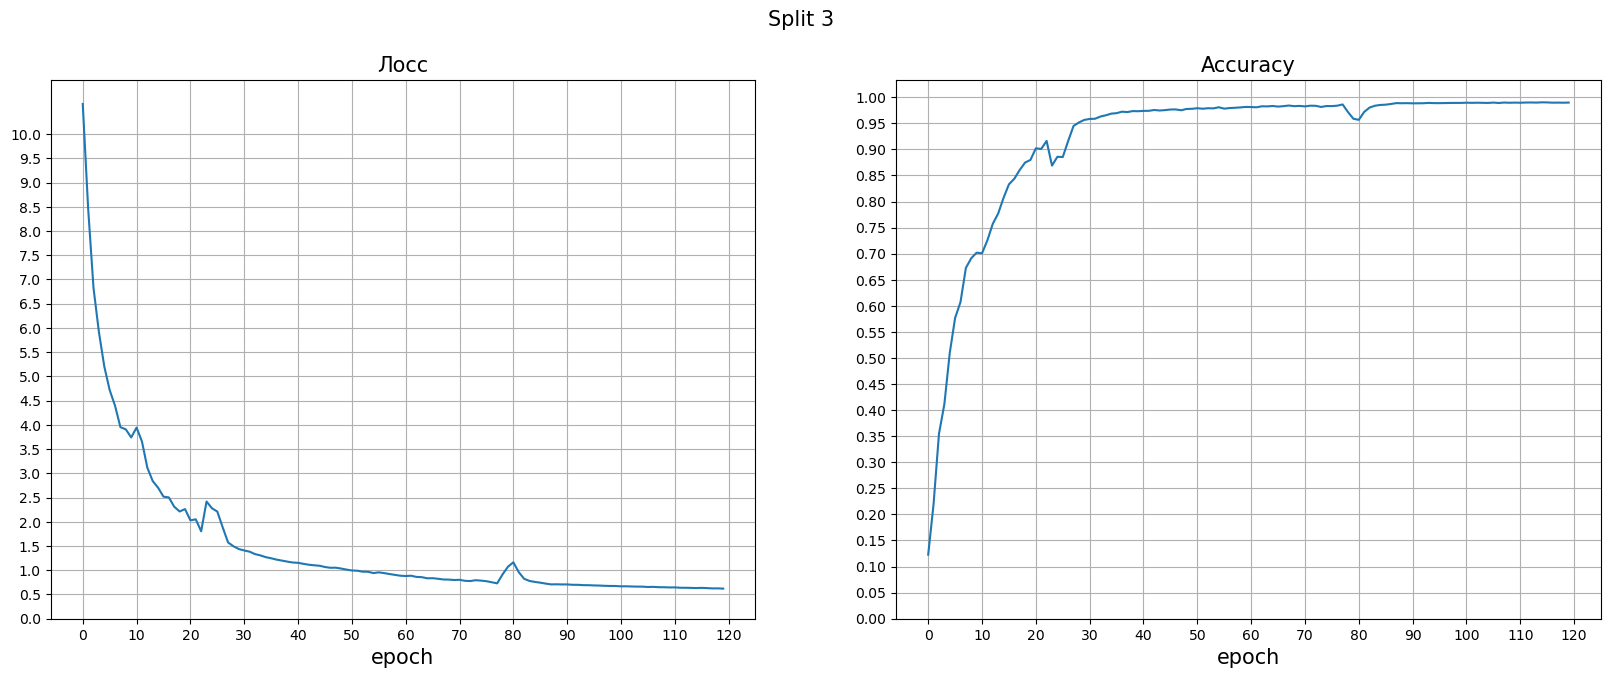

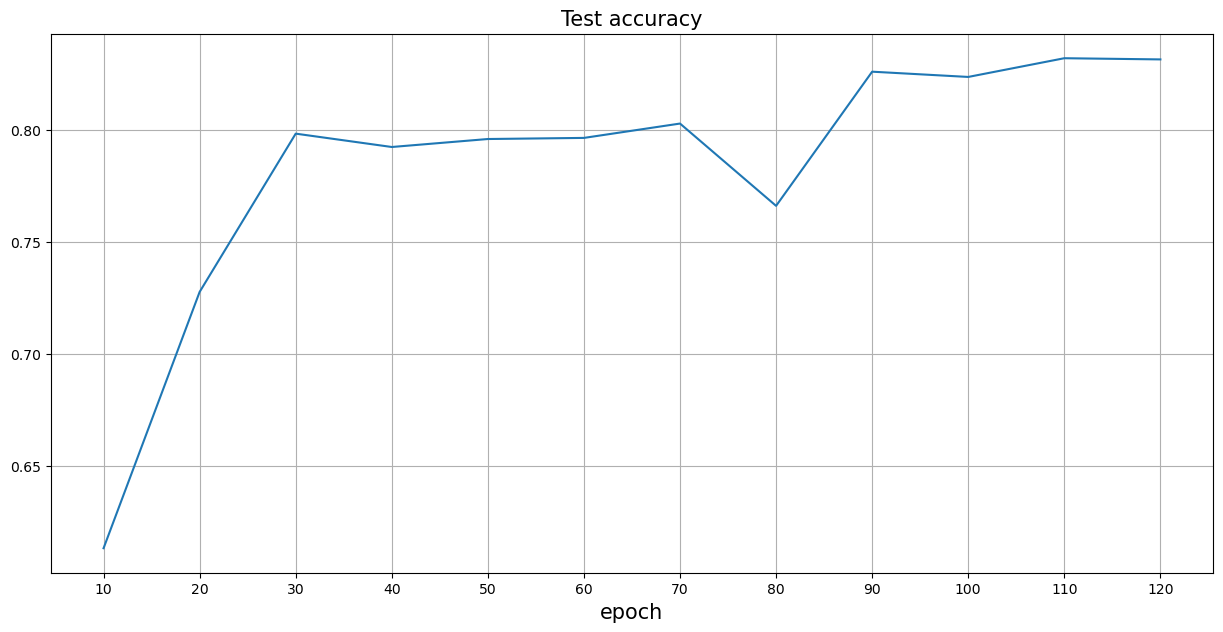

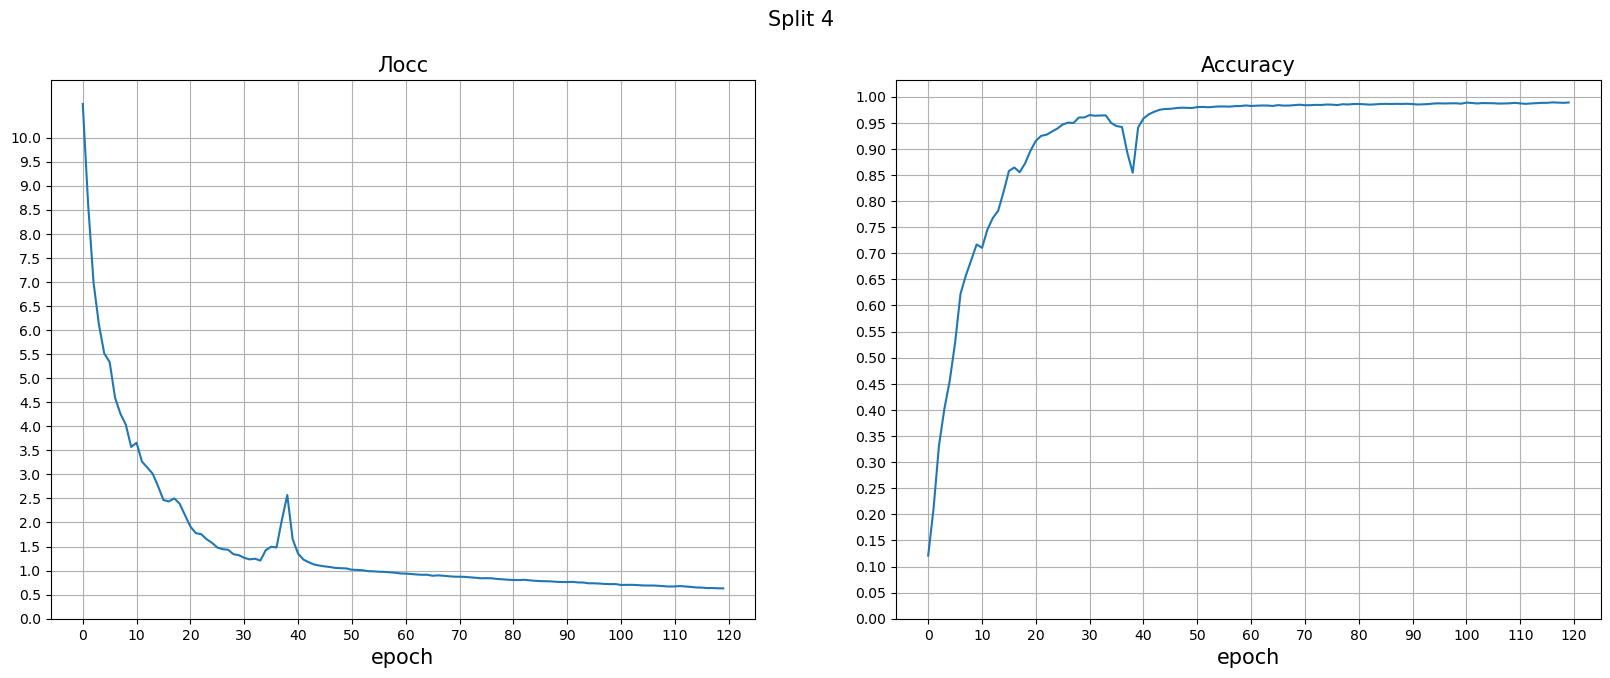

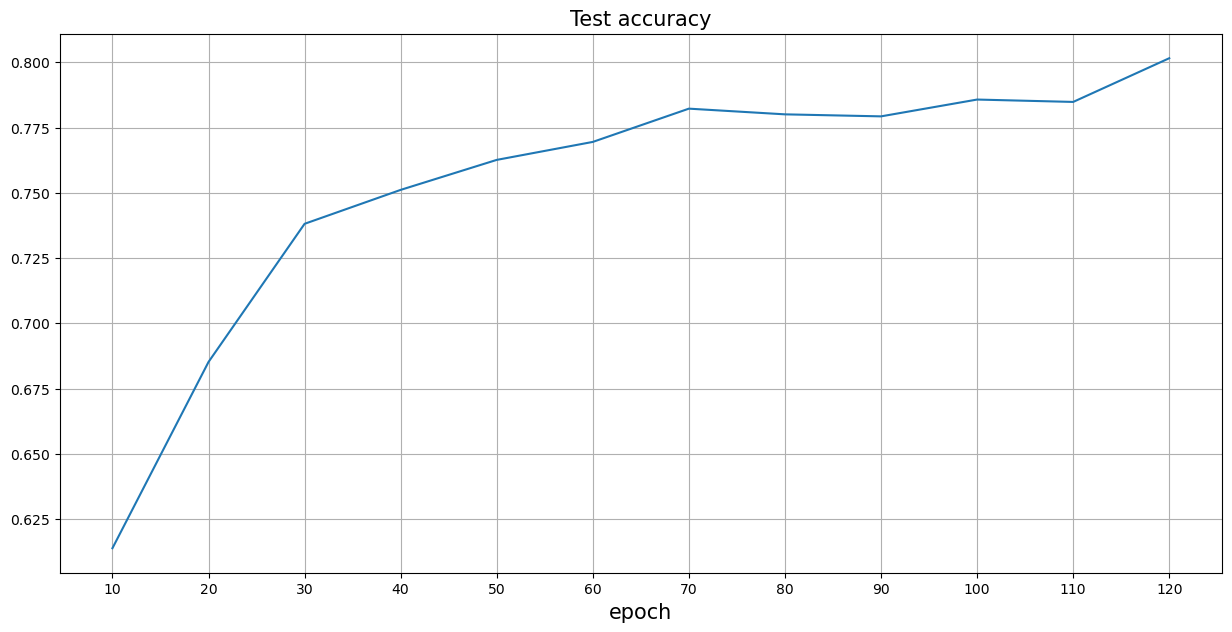

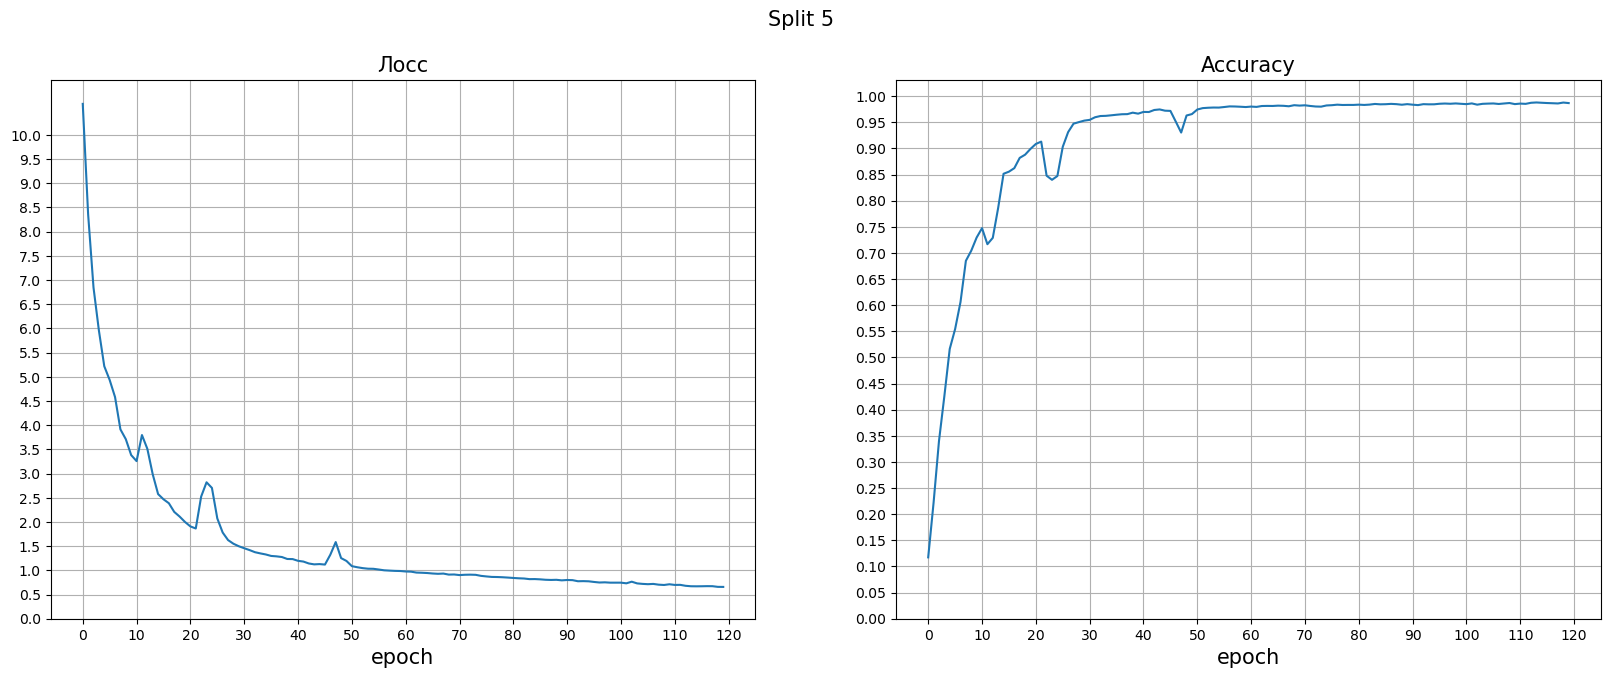

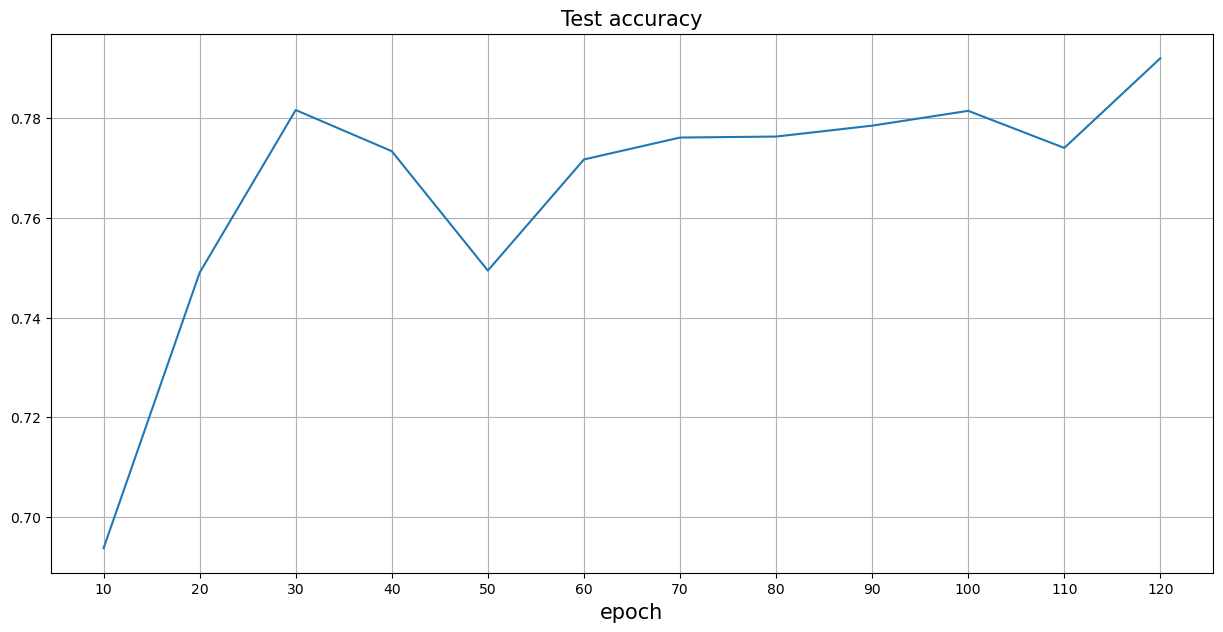

In [66]:
end_accuracy = []
max_accuracy = []
max_accuracy_epoch = []

for t in range(1, 6):
    loss = []
    acc = []
    tst_acc = []
    
    with open('split' + str(t) + '-back-cut-diff-pool.log') as f:
        lines = f.readlines()
        
        for line in lines:
            if line.startswith('[epoch '):
                nums = re.findall('[\d]+\.[\d]+', line)
                loss.append(float(nums[0]))
                acc.append(float(nums[1]))
                
            elif line.startswith('---[epoch '):
                tst_acc.append(float(re.findall('[\d]+\.[\d]+', line)[0]))
                
        end_accuracy.append(tst_acc[-1])
        max_accuracy_epoch.append((np.argmax(tst_acc) * 10) + 10)
        max_accuracy.append(np.max(tst_acc))
                    
        fig, axes = plt.subplots(1, 2, figsize=(20, 7))
        plt.suptitle('Split ' + str(t), fontsize = 15)
            
        axes[0].plot(loss)
        axes[0].grid()
        axes[0].set_title('Лосс', fontsize = 15)
        axes[0].set_xlabel('epoch', fontsize = 15)
        axes[0].set_xticks(np.arange(0, 130, 10))
        axes[0].set_yticks(np.arange(0, 10.5, 0.5))
            
        axes[1].plot(acc)
        axes[1].grid()
        axes[1].set_title('Accuracy', fontsize = 15)
        axes[1].set_xlabel('epoch', fontsize = 15)
        axes[1].set_xticks(np.arange(0, 130, 10))
        axes[1].set_yticks(np.arange(0, 1.05, 0.05))
            
        plt.figure(figsize = (15, 7))
        plt.plot(np.arange(10, 130, 10), tst_acc)
        plt.title('Test accuracy', fontsize = 15)
        plt.grid()
        plt.xlabel('epoch', fontsize = 15)
        plt.xticks(np.arange(10, 130, 10))
        f.close()

In [76]:
acc_eval = []

for t in range(1, 6):
    with open('split' + str(t) + '-back-cut-diff-pool-res.log') as f:
        lines = f.readlines()
        for line in lines:
            if line.startswith('Acc: '):
                acc_eval.append(float(re.findall('[\d]+\.[\d]+', line)[0]))
        f.close()

In [77]:
sum_table = pd.DataFrame([])
sum_table['split'] = np.arange(1, 6)
sum_table['end_accuracy'] = end_accuracy
sum_table['best_accuracy'] = max_accuracy
sum_table['get_on_epoch'] = max_accuracy_epoch
sum_table['eval_accuracy'] = acc_eval

display(sum_table)

,split,end_accuracy,best_accuracy,get_on_epoch,eval_accuracy
0,1,0.758221,0.758221,120,75.8307
1,2,0.779617,0.790052,90,77.9665
2,3,0.831653,0.832184,110,83.1514
3,4,0.801570,0.801570,120,80.1622
4,5,0.792036,0.792036,120,79.1981


In [78]:
authors_sum_table = pd.DataFrame([])
authors_sum_table['split'] = np.arange(1, 6)
authors_sum_table['end_accuracy'] = [0.805046, 0.890464, 0.869294, 0.872374, 0.892572]
authors_sum_table['best_accuracy'] = [0.812160, 0.891671, 0.869294, 0.872821, 0.892572]
authors_sum_table['get_on_epoch'] = [110, 110, 120, 70, 120]

display(authors_sum_table)

,split,end_accuracy,best_accuracy,get_on_epoch
0,1,0.805046,0.812160,110
1,2,0.890464,0.891671,110
2,3,0.869294,0.869294,120
3,4,0.872374,0.872821,70
4,5,0.892572,0.892572,120
